# Imports


In [ ]:
!pip install visualkeras
!pip install xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# Libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [ ]:
import visualkeras
import tensorflow
from tensorflow import keras as keras
from keras import callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model

from keras import Model, Sequential

from keras.optimizers import Adam

from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError

from keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, GRU, LSTMCell
from keras.layers import Conv2D, MaxPooling2D, Flatten, Bidirectional, LSTM, Dense, TimeDistributed, Conv1D, MaxPooling1D, Dropout, Conv3D
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
file_path = '/gdrive/My Drive/BharatBench/Datasets/IMDAA_merged_1.08_1990_2020.nc'
data=  xr.open_dataset(file_path)
data.head()

<xarray.Dataset> Size: 2kB
Dimensions:   (time: 5, latitude: 5, longitude: 5)
Coordinates:
  * time      (time) datetime64[ns] 40B 1990-01-01 ... 1990-01-02
    lat       (latitude) float64 40B ...
    lon       (longitude) float64 40B ...
Dimensions without coordinates: latitude, longitude
Data variables:
    HGT_prl   (time, latitude, longitude) float32 500B ...
    TMP_prl   (time, latitude, longitude) float32 500B ...
    TMP_2m    (time, latitude, longitude) float32 500B ...
    APCP_sfc  (time, latitude, longitude) float32 500B ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Wed Jun 14 21:34:08 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...
    regrid_method:        bilinear

# Visualize the data

In [ ]:
data.attrs

{'CDI': 'Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)',
 'Conventions': 'COARDS',
 'history': 'Wed Jun 14 21:34:08 2023: cdo -f nc4c -z zip_4 copy -mergetime -cat /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199001.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199002.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199003.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199004.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199005.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199006.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199007.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199008.nc /DATA2/tmpdata/query-processed/AqoSuNR7FfLIAP0a36Fgeg/ncum_imdaa_reanl_HGT-prl_199009.nc /DATA2/tmpdata/q

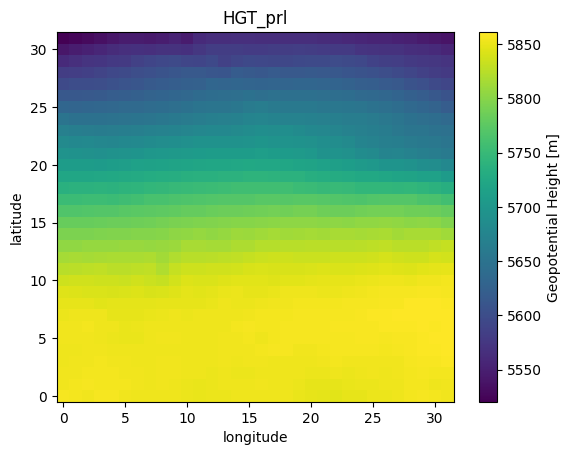

HGT_prl


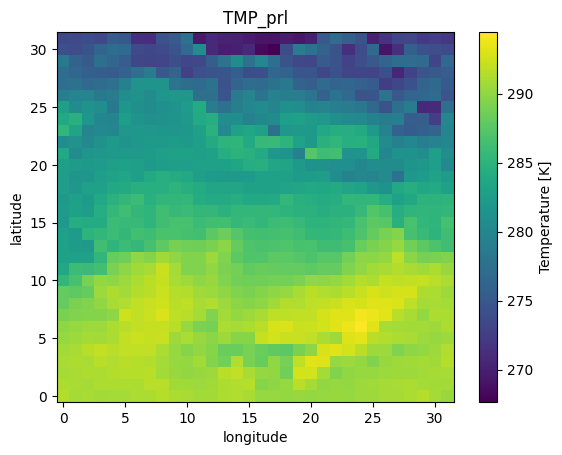

TMP_prl


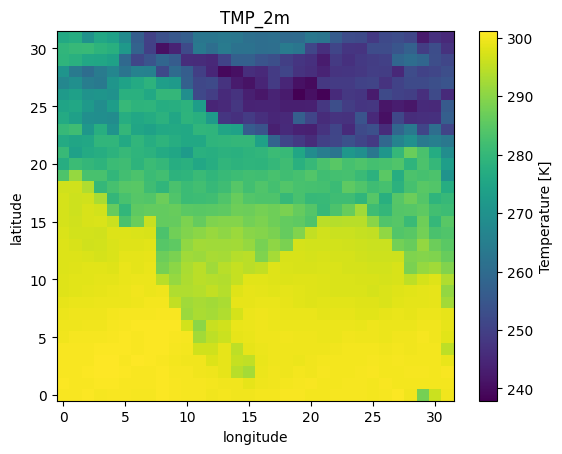

TMP_2m


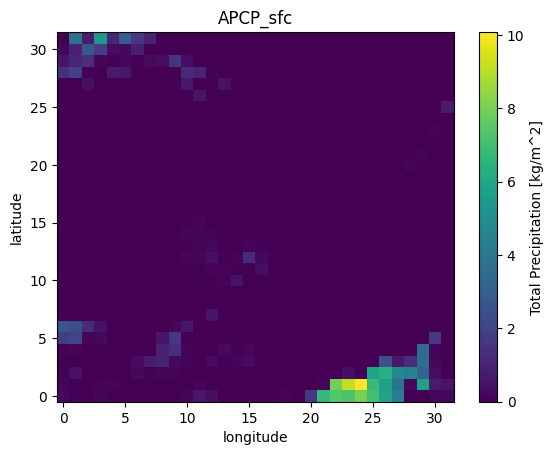

APCP_sfc


In [ ]:
for var in data.data_vars:
    data[var].isel(time=0).plot()
    plt.title(var)
    plt.show()
    print(var)

# Define Stuff

In [ ]:
var_name = ['HGT_prl', 'TMP_prl', 'TMP_2m', 'APCP_sfc'] # [H500, T850, T2m, TP6h]

In [ ]:
ds = data['TMP_prl']
ds = ds.to_dataset()
ds

<xarray.Dataset> Size: 186MB
Dimensions:  (time: 45292, latitude: 32, longitude: 32)
Coordinates:
  * time     (time) datetime64[ns] 362kB 1990-01-01 ... 2020-12-31T18:00:00
    lat      (latitude) float64 256B ...
    lon      (longitude) float64 256B ...
Dimensions without coordinates: latitude, longitude
Data variables:
    TMP_prl  (time, latitude, longitude) float32 186MB ...

In [ ]:
# training dataset selection
train_years = slice('1990', '2017')
# validation dataset selection (this dataset helps with overfitting)
valid_years = slice('2018', '2018')
# test dataset selection
test_years = slice('2019', '2020')
# prediction days ahead
lead_time_steps = 20 # consider the number of observations per day

# Define Functions

In [ ]:
def get_train_valid_test_dataset(lead_steps, Data_array):
  # Split train, valid and test dataset
  train_data = Data_array.sel(time=train_years)
  valid_data = Data_array.sel(time=valid_years)
  test_data = Data_array.sel(time=test_years)

  # Normalize the data using the mean and standard deviation of the training data
  # mean = train_data.mean(dim = "time")
  # std = train_data.std(dim = "time")

  mean = train_data.mean()
  std = train_data.std()

  train_data = (train_data - mean) / std
  valid_data = (valid_data - mean) / std
  test_data = (test_data - mean) / std

  # Create inputs and outputs that are shifted by lead_steps
  X_train = train_data[list(Data_array)[0]].isel(time=slice(None, -lead_steps)).values[..., None]
  Y_train = train_data[list(Data_array)[0]].isel(time=slice(lead_steps, None)).values[..., None]
  X_valid = valid_data[list(Data_array)[0]].isel(time=slice(None, -lead_steps)).values[..., None]
  Y_valid = valid_data[list(Data_array)[0]].isel(time=slice(lead_steps, None)).values[..., None]
  X_test = test_data[list(Data_array)[0]].isel(time=slice(None, -lead_steps)).values[..., None]
  Y_test = test_data[list(Data_array)[0]].isel(time=slice(lead_steps, None)).values[..., None]
  return X_train, Y_train, X_valid, Y_valid, X_test, Y_test, mean, std

In [ ]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test, mean, std = get_train_valid_test_dataset(lead_time_steps, ds)

In [ ]:
mean

<xarray.Dataset> Size: 4B
Dimensions:  ()
Data variables:
    TMP_prl  float32 4B 291.7

In [ ]:
std

<xarray.Dataset> Size: 4B
Dimensions:  ()
Data variables:
    TMP_prl  float32 4B 5.831

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(40888, 32, 32, 1)
(40888, 32, 32, 1)
(1440, 32, 32, 1)
(1440, 32, 32, 1)
(2904, 32, 32, 1)
(2904, 32, 32, 1)


In [ ]:
# Convert to PyTorch tensors for the Spherical CNN
X_train_torch = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # Channels first
Y_train_torch = torch.tensor(Y_train, dtype=torch.float32)
X_valid_torch = torch.tensor(X_valid, dtype=torch.float32).permute(0, 3, 1, 2)
Y_valid_torch = torch.tensor(Y_valid, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)
Y_test_torch = torch.tensor(Y_test, dtype=torch.float32)

Evaluation Metrics

In [ ]:
def compute_rmse(prediction, actual,  mean_dims = ('time', 'latitude', 'longitude')):
  error = prediction - actual
  rmse = np.sqrt(((error)**2 ).mean(mean_dims))
  return rmse

In [ ]:
def compute_mae(prediction, actual, mean_dims = ('time', 'latitude', 'longitude')):
    error = prediction - actual
    mae = np.abs(error).mean(mean_dims)
    return mae

In [ ]:
def compute_acc(prediction, actual):
    clim = actual.mean('time')
    try:
        t = np.intersect1d(prediction.time, actual.time)
        pred_anomaly = prediction.sel(time=t) - clim
    except AttributeError:
        t = actual.time.values
        pred_anomaly = prediction - clim
    act_anomaly = actual.sel(time=t) - clim

    pred_norm = pred_anomaly - pred_anomaly.mean()
    act_norm = act_anomaly - act_anomaly.mean()

    acc = (
            np.sum(pred_norm * act_norm) /
            np.sqrt(
                np.sum(pred_norm ** 2) * np.sum(act_norm ** 2)
            )
    )
    return acc

# CNN

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(40888, 32, 32, 1)
(40888, 32, 32, 1)
(1440, 32, 32, 1)
(1440, 32, 32, 1)
(2904, 32, 32, 1)
(2904, 32, 32, 1)


In [ ]:
def fit_model(model):

    history = model.fit(X_train, Y_train, epochs = 10,
                        validation_data= (X_valid, Y_valid) ,
                        batch_size = 32, shuffle = False,
                        callbacks = [early_stop])
    return history

## CNN Original Model

In [ ]:
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    # keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.UpSampling2D(),
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.UpSampling2D(),
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.UpSampling2D(),
    keras.layers.Conv2D(32, 5, padding='same', activation= 'selu'),
    keras.layers.UpSampling2D(),
    # keras.layers.BatchNormalization(),

    keras.layers.Conv2D(1, 5, padding='same'),

    # No activation since we are solving a regression problem
])

In [ ]:
model_cnn.build(X_train[:32].shape)
model_cnn.compile(keras.optimizers.Adam(learning_rate=1e-5), 'mse')
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (32, 32, 32, 32)            │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 16, 16, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 16, 16, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 8, 8, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 8, 8, 32)              │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 4, 4, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 4, 4, 32)              │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 2, 2, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 2, 2, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 2, 2, 32)              │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (32, 4, 4, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 32)              │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (32, 8, 8, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 8, 8, 32)              │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (32, 16, 16, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 16, 16, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (32, 32, 32, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 32, 32, 1)             │             801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,057 (707.25 KB)

 Trainable params: 181,057 (707.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, verbose=1)
history_cnn = fit_model(model_cnn)

Epoch 1/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.4622 - val_loss: 0.2067
Epoch 2/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.2304 - val_loss: 0.1899
Epoch 3/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2122 - val_loss: 0.1821
Epoch 4/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2023 - val_loss: 0.1780
Epoch 5/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1960 - val_loss: 0.1738
Epoch 6/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1919 - val_loss: 0.1715
Epoch 7/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1885 - val_loss: 0.1706
Epoch 8/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1859 - val_loss: 0.1684
Epoch 9/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1833 - val_loss: 0.1668
Epoch 10/10
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1815 - val_loss: 0.1658


## Define the Spherical CNN Model

In [ ]:

variables = ['HGT_prl', 'TMP_prl', 'TMP_2m', 'APCP_sfc']

class BasicCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.5)
        self.fc = nn.Linear(256 * 8 * 8, out_channels)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 8 * 8)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Initialize the model with in_channels matching the number of input channels
model_scnn = SphericalCNN(in_channels=1, out_channels=32)

# Initialize the model
model_cnn = BasicCNN(in_channels=1, out_channels=1)


## Train Spherical Model

In [ ]:
def fit_spherical_model(model, X_train, Y_train, X_valid, Y_valid, epochs=10, batch_size=32):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    criterion = torch.nn.MSELoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, Y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            valid_output = model(X_valid)
            valid_loss = criterion(valid_output, Y_valid)
        print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Validation Loss: {valid_loss.item()}')


## Evaluate Model

In [ ]:
# Initialize and train the Spherical CNN model

print("X_train_torch shape:", X_train_torch.shape)
print("Y_train_torch shape:", Y_train_torch.shape)
print("X_valid_torch shape:", X_valid_torch.shape)
print("Y_valid_torch shape:", Y_valid_torch.shape)




model_scnn = SphericalCNN(in_channels=len(variables), out_channels=32)
print("Model FieldType input size:", model_scnn.input_type.size)

fit_spherical_model(model_scnn, X_train_torch, Y_train_torch, X_valid_torch, Y_valid_torch)

# Evaluation
model_scnn.eval()
with torch.no_grad():
    pred_test_scnn = model_scnn(X_test_torch).numpy()

# Convert predictions back to original scale if needed
pred_test_scnn_rescaled = pred_test_scnn * std.values + mean.values

# Compute RMSE, MAE, ACC for the Spherical CNN
rmse_scnn = compute_rmse(pred_test_scnn_rescaled, Y_test)
mae_scnn = compute_mae(pred_test_scnn_rescaled, Y_test)
acc_scnn = compute_acc(pred_test_scnn_rescaled, Y_test)

print(f'Spherical CNN - RMSE: {rmse_scnn}, MAE: {mae_scnn}, ACC: {acc_scnn}')

# Performance of the standard CNN (already implemented)
target = ds.sel(time=test_years)
pred_test = X_test[:, :, :, 0].copy()
pred_test[:] = model_cnn.predict(X_test).squeeze()

# Unnormalize
pred_result = pred_test * std.TMP_prl.values + mean.TMP_prl.values
pred_result = xr.DataArray(pred_result, dims=target.isel(time=slice(lead_time_steps, None)).dims, coords=target.isel(time=slice(lead_time_steps, None)).coords)

# Compute RMSE, MAE, ACC for the standard CNN
rmse_cnn = compute_rmse(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values
mae_cnn = compute_mae(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values
acc_cnn = compute_acc(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values

print(f'CNN - RMSE: {rmse_cnn}, MAE: {mae_cnn}, ACC: {acc_cnn}')

X_train_torch shape: torch.Size([40888, 1, 32, 32])
Y_train_torch shape: torch.Size([40888, 32, 32, 1])
X_valid_torch shape: torch.Size([1440, 1, 32, 32])
Y_valid_torch shape: torch.Size([1440, 32, 32, 1])
Model FieldType input size: 4


AssertionError: Error! The size of the tensor torch.Size([40888, 1, 32, 32]) does not match the size of the field type 4.

## Performance of Model

In [ ]:
target = ds.sel(time=test_years)
# Convert predictions backto xarray
pred_test = X_test[:, :, :, 0].copy()
pred_test[:] = model_cnn.predict(X_test).squeeze()

# Unnormalize
pred_result = pred_test*std.TMP_prl.values + mean.TMP_prl.values
pred_result  = xr.DataArray(pred_result, dims=target.isel(time=slice(lead_time_steps, None)).dims, coords=target.isel(time=slice(lead_time_steps, None)).coords)
# compute RMSE
print('RMSE:', compute_rmse(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values)
print('MAE', compute_mae(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values)
print('ACC', compute_acc(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values)

## Visualization of Model

In [ ]:
# # plot training history
# # print("Values stored in history are ... \n", history_cnn.history)
# plt.plot(history_cnn.history['loss'], label='train')
# plt.plot(history_cnn.history['val_loss'], label='test')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
# # # Visualize the architecture of the CNN
# # tf.keras.utils.plot_model(model, to_file= "CNN_IMDAA.png", show_shapes=True)
# # Visualize the architecture of the CNN
# keras.utils.plot_model(model_cnn, show_shapes=True)

In [ ]:
# visualkeras.layered_view(model_cnn, legend=True, draw_volume = 2)

# convLSTM

In [ ]:
X_train = X_train[:, np.newaxis,:,:,:]
Y_train = Y_train[:, np.newaxis,:,:,:]
X_valid = X_valid[:, np.newaxis,:,:,:]
Y_valid = Y_valid[:, np.newaxis,:,:,:]
X_test = X_test[:, np.newaxis,:,:,:]
Y_test = Y_test[:, np.newaxis,:,:,:]

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
# Build an convLSTM network
model_conv_lstm = keras.Sequential([
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.MaxPooling3D(pool_size=(1, 2, 2)),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.MaxPooling3D(pool_size=(1, 2, 2)),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.MaxPooling3D(pool_size=(1, 2, 2)),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.MaxPooling3D(pool_size=(1, 2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.UpSampling3D(size=(1, 2, 2)),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.UpSampling3D(size=(1, 2, 2)),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.UpSampling3D(size=(1, 2, 2)),
    keras.layers.ConvLSTM2D(filters=32, kernel_size=(5, 5), padding="same", return_sequences=True, activation= 'swish'),
    keras.layers.UpSampling3D(size=(1, 2, 2)),

    keras.layers.Conv3D(filters=1, kernel_size=(5, 5, 5),  padding="same")
])

In [ ]:
model_conv_lstm.build((None, 1, 32, 32,  1))
model_conv_lstm.compile(keras.optimizers.Adam(learning_rate=1e-6), 'mse')
model_conv_lstm.summary()

In [ ]:
# #create callback
# filepath = 'D:/VSCODE_Works/BharatBench/ignore/IMDAA_convlstm_H500_3days.hdf5'
# checkpoint = ModelCheckpoint(filepath=filepath,
#                              monitor='val_loss',
#                              verbose=1,
#                              save_best_only=True,
#                              mode='min')

# early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 3, verbose=1)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, verbose=1)
def fit_model(model):

    history = model.fit(X_train, Y_train, epochs = 1,
                        validation_data= (X_valid, Y_valid) ,
                        batch_size = 32, shuffle = False,
                        callbacks = [early_stop])
    return history
history_conv_lstm = fit_model(model_conv_lstm)

In [ ]:
# model.save('IMDAA_convlstm_T850_5days_val_loss_0.1728.hdf5')

In [ ]:
# model = load_model('IMDAA_convlstm_T850_5days_val_loss_0.1728.hdf5')

In [ ]:
target = ds.sel(time=test_years)

pred_test = model_conv_lstm.predict(X_test).squeeze()

# Unnormalize
pred_result = pred_test*std.TMP_prl.values + mean.TMP_prl.values
pred_result  = xr.DataArray(pred_result, dims=target.isel(time=slice(lead_time_steps, None)).dims, coords=target.isel(time=slice(lead_time_steps, None)).coords)
# compute RMSE
print('RMSE:', compute_rmse(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values)
print('MAE', compute_mae(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values)
print('ACC', compute_acc(pred_result, target.isel(time=slice(lead_time_steps, None))).TMP_prl.values)

In [ ]:
# keras.utils.plot_model(model_conv_lstm, show_shapes=True)

In [ ]:
visualkeras.layered_view(model_conv_lstm, legend=True, draw_volume = 1)